<a href="https://colab.research.google.com/github/luisbelisario/machine_learning_projects/blob/main/analise_colheitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('crops.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
df_copy = df.copy()
df_copy.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [ ]:
df_copy.drop(labels=['ID'], axis=1, inplace=True)
df_copy.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [ ]:
df_copy.rename({'Estimated_Insects_Count': 'numero_insetos',
                'Crop_Type': 'tipo_plantacao',
                'Soil_Type': 'tipo_solo',
                'Pesticide_Use_Category': 'tipo_pesticida',
                'Number_Doses_Week': 'qtd_doses_pesticida_semana',
                'Number_Weeks_Used': 'qtd_semanas_uso_pesticida',
                'Number_Weeks_Quit': 'qtd_semanas_quit',
                'Season': 'epoca_ano',
                'Crop_Damage': 'dano_plantacao'}, axis=1, inplace=True)
df_copy.head()

,numero_insetos,tipo_plantacao,tipo_solo,tipo_pesticida,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,epoca_ano,dano_plantacao
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [ ]:
df_copy.info()
# a coluna qtd_semanas_uso_pesticida tem muitos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   numero_insetos              88858 non-null  int64  
 1   tipo_plantacao              88858 non-null  int64  
 2   tipo_solo                   88858 non-null  int64  
 3   tipo_pesticida              88858 non-null  int64  
 4   qtd_doses_pesticida_semana  88858 non-null  int64  
 5   qtd_semanas_uso_pesticida   79858 non-null  float64
 6   qtd_semanas_quit            88858 non-null  int64  
 7   epoca_ano                   88858 non-null  int64  
 8   dano_plantacao              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [ ]:
# Quantidade de plantacoes boa, media e ruim
df_copy['dano_plantacao'].value_counts()

0    74238
1    12307
2     2313
Name: dano_plantacao, dtype: int64

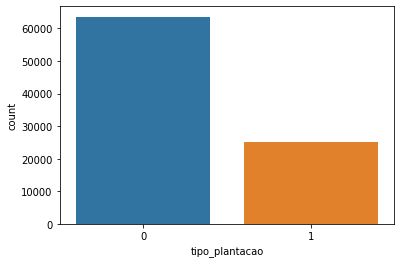

In [ ]:
sns.countplot(df_copy['tipo_plantacao']);

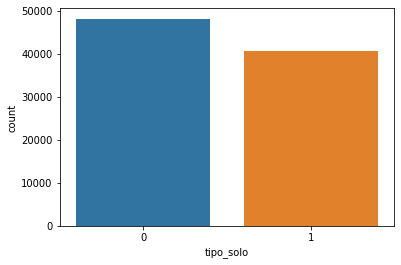

In [ ]:
sns.countplot(df_copy['tipo_solo']);

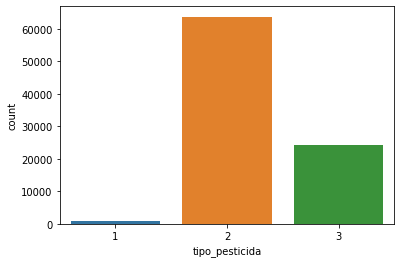

In [ ]:
sns.countplot(df_copy['tipo_pesticida']);

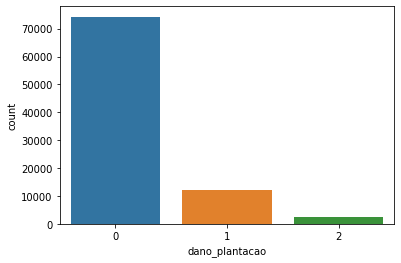

In [ ]:
sns.countplot(df_copy['dano_plantacao']);
# 0 - Boa
# 1 - Média
# 2 - Ruim

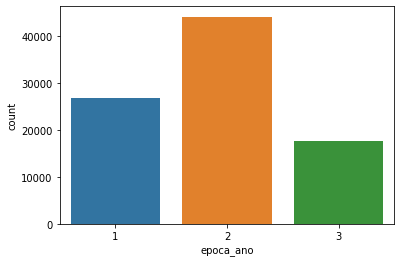

In [ ]:
sns.countplot(df_copy['epoca_ano']);
# 1 - Janeiro a Abril
# 2 - Maio a Agosto
# 3 - Setembro a Dezembro

In [ ]:
df_copy.isnull().sum()
# a coluna qtd_semanas_uso_pesticida tem 9000 valores nulos

numero_insetos                   0
tipo_plantacao                   0
tipo_solo                        0
tipo_pesticida                   0
qtd_doses_pesticida_semana       0
qtd_semanas_uso_pesticida     9000
qtd_semanas_quit                 0
epoca_ano                        0
dano_plantacao                   0
dtype: int64

In [ ]:
# Excluindo valores nulos
df_copy.dropna(inplace=True)

In [ ]:
df_copy.isnull().sum()

numero_insetos                0
tipo_plantacao                0
tipo_solo                     0
tipo_pesticida                0
qtd_doses_pesticida_semana    0
qtd_semanas_uso_pesticida     0
qtd_semanas_quit              0
epoca_ano                     0
dano_plantacao                0
dtype: int64

In [ ]:
df_copy.duplicated().sum()

623

In [ ]:
# Excluindo valores duplicados
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy.duplicated().sum()

0

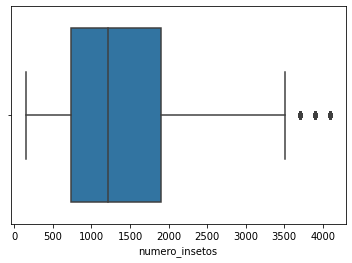

In [ ]:
sns.boxplot(x=df_copy['numero_insetos']);
# o numero medio de insetos ficou na casa dos 1200
# retirar os outliers melhora o desempenho do algoritmo

In [ ]:
# Removendo os outliers
q_menor = df_copy['numero_insetos'].quantile(0.01)
q_maior = df_copy['numero_insetos'].quantile(0.99)
df_copy = df_copy[(df_copy['numero_insetos'] < q_maior) & (df_copy['numero_insetos'] > q_menor)]

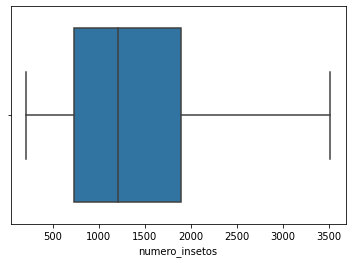

In [ ]:
# outliers removidos
sns.boxplot(x=df_copy['numero_insetos']);

In [ ]:
df_copy.head()

,numero_insetos,tipo_plantacao,tipo_solo,tipo_pesticida,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,epoca_ano,dano_plantacao
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
7,577,1,0,1,0,0.0,0,1,2


In [ ]:
X = df_copy.iloc[:, 0:8].values
X.shape

(76885, 8)

In [ ]:
y = df_copy.iloc[:, 8].values
y.shape

(76885,)

In [ ]:
# Testes com os algoritmos Logistic Regression, Decision Tree e Random Forest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
resultados_naive_b = []
resultados_logistic_r = []
resultados_decision_t = []
resultados_random_f = []

In [ ]:
# Serão feitos 30 testes para cada algoritmo
# A cada teste feito o seu accuracy vai ser armazenada na respectva lista do algoritmo
# Ao final será obtiada a média da lista de cada algoritmo e essa média será reportada
# test_size faz com que os dados sejam divididos em 80% para treino e 20% para teste
# o random_state = i faz com que sejam selecionados valores diferentes a cada iteração
# stratify faz a divisão proporcional y com base na quantidade de cada valor possível
for i in range(5):
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2,
                                                            stratify=y,
                                                            random_state=i)
    naive_b = GaussianNB()
    naive_b.fit(X_treino, y_treino)
    resultados_naive_b.append(accuracy_score(y_teste, naive_b.predict(X_teste)))

    logistic_r = LogisticRegression()
    logistic_r.fit(X_treino, y_treino)
    resultados_logistic_r.append(accuracy_score(y_teste, logistic_r.predict(X_teste)))

    decision_t = tree.DecisionTreeClassifier()
    decision_t.fit(X_treino, y_treino)
    resultados_decision_t.append(accuracy_score(y_teste, decision_t.predict(X_teste)))

    random_f = RandomForestClassifier()
    random_f.fit(X_treino, y_treino)
    resultados_random_f.append(accuracy_score(y_teste, random_f.predict(X_teste)))

In [ ]:
resultados_naive_b = np.array(resultados_naive_b)
resultados_logistic_r = np.array(resultados_logistic_r)
resultados_decision_t = np.array(resultados_decision_t)
resultados_random_f = np.array(resultados_random_f)

In [ ]:
# Naive Bayes = 82%
# Regressão logistica = 84%
# Decision tree = 74%
# Random Forest = 82%
resultados_naive_b.mean(), resultados_logistic_r.mean(), resultados_decision_t.mean(), resultados_random_f.mean()

(0.8259773723128084,
 0.8428587428554912,
 0.7469272289783442,
 0.8246196573186079)

Próximos passos:

*   One-hot Encoder - criação de variáveis atributos get_dummies()
*   Subamostragem e Sobreamostragem
*   Seleção de atributos mais eficazes com Qui quadrado
*   Utilizar cross validation em vez de train test split


## One-hot encoder

In [ ]:
df_copy.head()

,numero_insetos,tipo_plantacao,tipo_solo,tipo_pesticida,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,epoca_ano,dano_plantacao
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
7,577,1,0,1,0,0.0,0,1,2


In [ ]:
for col in ['tipo_plantacao', 'tipo_solo', 'tipo_pesticida', 'epoca_ano']:
    df_copy = pd.get_dummies(df_copy, columns=[col])

In [ ]:
df_copy.head()

,numero_insetos,qtd_doses_pesticida_semana,qtd_semanas_uso_pesticida,qtd_semanas_quit,dano_plantacao,tipo_plantacao_0,tipo_plantacao_1,tipo_solo_0,tipo_solo_1,tipo_pesticida_1,tipo_pesticida_2,tipo_pesticida_3,epoca_ano_1,epoca_ano_2,epoca_ano_3
1,209,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
2,257,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
3,257,0,0.0,0,1,0,1,0,1,1,0,0,0,1,0
4,342,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
7,577,0,0.0,0,2,0,1,1,0,1,0,0,1,0,0


In [ ]:
X = df_copy.drop(['dano_plantacao'], axis=1)
y = df_copy['dano_plantacao'].values.reshape(-1,1)

In [ ]:
resultados_naive_b = []
resultados_logistic_r = []
resultados_decision_t = []
resultados_random_f = []

In [ ]:
for i in range(5):
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2,
                                                            stratify=y,
                                                            random_state=i)
    naive_b = GaussianNB()
    naive_b.fit(X_treino, y_treino)
    resultados_naive_b.append(accuracy_score(y_teste, naive_b.predict(X_teste)))

    logistic_r = LogisticRegression()
    logistic_r.fit(X_treino, y_treino)
    resultados_logistic_r.append(accuracy_score(y_teste, logistic_r.predict(X_teste)))

    decision_t = tree.DecisionTreeClassifier()
    decision_t.fit(X_treino, y_treino)
    resultados_decision_t.append(accuracy_score(y_teste, decision_t.predict(X_teste)))

    random_f = RandomForestClassifier()
    random_f.fit(X_treino, y_treino)
    resultados_random_f.append(accuracy_score(y_teste, random_f.predict(X_teste)))

In [ ]:
resultados_naive_b = np.array(resultados_naive_b)
resultados_logistic_r = np.array(resultados_logistic_r)
resultados_decision_t = np.array(resultados_decision_t)
resultados_random_f = np.array(resultados_random_f)

In [ ]:
# Com one-hot encoder:
# Naive Bayes = 83%
# Regressão logistica = 83%
# Decision tree = 74%
# Random Forest = 82%
resultados_naive_b.mean(), resultados_logistic_r.mean(), resultados_decision_t.mean(), resultados_random_f.mean()

(0.8320998894452754,
 0.8391753918189504,
 0.7493919490147624,
 0.8226572153215843)

## Subamostragem

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_under, y_under, id_under = tl.fit_sample(X, y)

In [ ]:
X_under.shape, y_under.shape

((72834, 14), (72834,))

In [ ]:
resultados_naive_b = []
resultados_logistic_r = []
resultados_decision_t = []
resultados_random_f = []

In [ ]:
for i in range(5):
    X_treino_u, X_teste_u, y_treino_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2,
                                                            stratify=y_under,
                                                            random_state=i)
    naive_b = GaussianNB()
    naive_b.fit(X_treino_u, y_treino_u)
    resultados_naive_b.append(accuracy_score(y_teste_u, naive_b.predict(X_teste_u)))

    logistic_r = LogisticRegression()
    logistic_r.fit(X_treino_u, y_treino_u)
    resultados_logistic_r.append(accuracy_score(y_teste_u, logistic_r.predict(X_teste_u)))

    decision_t = tree.DecisionTreeClassifier()
    decision_t.fit(X_treino_u, y_treino_u)
    resultados_decision_t.append(accuracy_score(y_teste_u, decision_t.predict(X_teste_u)))

    random_f = RandomForestClassifier()
    random_f.fit(X_treino_u, y_treino_u)
    resultados_random_f.append(accuracy_score(y_teste_u, random_f.predict(X_teste_u)))

In [ ]:
resultados_naive_b = np.array(resultados_naive_b)
resultados_logistic_r = np.array(resultados_logistic_r)
resultados_decision_t = np.array(resultados_decision_t)
resultados_random_f = np.array(resultados_random_f)

In [ ]:
# Com subamostragem:
# Naive Bayes = 82%
# Regressão logistica = 83%
# Decision tree = 75%
# Random Forest = 82%
resultados_naive_b.mean(), resultados_logistic_r.mean(), resultados_decision_t.mean(), resultados_random_f.mean()

(0.8269101393560788, 0.8303700144161461, 0.754252763094666, 0.8238346948582412)

## Sobreamostragem

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(ratio='minority')
X_over, y_over = smote.fit_sample(X, y)

In [ ]:
X_over.shape, y_over.shape

((139790, 14), (139790,))

In [ ]:
resultados_naive_b = []
resultados_logistic_r = []
resultados_decision_t = []
resultados_random_f = []

In [ ]:
for i in range(5):
    X_treino_o, X_teste_o, y_treino_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2,
                                                            stratify=y_over,
                                                            random_state=i)
    naive_b = GaussianNB()
    naive_b.fit(X_treino_o, y_treino_o)
    resultados_naive_b.append(accuracy_score(y_teste_o, naive_b.predict(X_teste_o)))

    logistic_r = LogisticRegression()
    logistic_r.fit(X_treino_o, y_treino_o)
    resultados_logistic_r.append(accuracy_score(y_teste_o, logistic_r.predict(X_teste_o)))

    decision_t = tree.DecisionTreeClassifier()
    decision_t.fit(X_treino_o, y_treino_o)
    resultados_decision_t.append(accuracy_score(y_teste_o, decision_t.predict(X_teste_o)))

    random_f = RandomForestClassifier()
    random_f.fit(X_treino_o, y_treino_o)
    resultados_random_f.append(accuracy_score(y_teste_o, random_f.predict(X_teste_o)))

In [ ]:
resultados_naive_b = np.array(resultados_naive_b)
resultados_logistic_r = np.array(resultados_logistic_r)
resultados_decision_t = np.array(resultados_decision_t)
resultados_random_f = np.array(resultados_random_f)

In [ ]:
# Com sobreamostragem:
# Naive Bayes = 71%
# Regressão logistica = 68%
# Decision tree = 85%
# Random Forest = 89%
resultados_naive_b.mean(), resultados_logistic_r.mean(), resultados_decision_t.mean(), resultados_random_f.mean()

(0.713269904857286, 0.6855497532012305, 0.8573145432434366, 0.8993561771228272)

In [ ]:
# Testando com KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
resultados_knn = []
resultados_decision_t = []
resultados_random_f = []

In [ ]:
for i in range(5):
    X_treino_o, X_teste_o, y_treino_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2,
                                                            stratify=y_over,
                                                            random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_treino_o, y_treino_o)
    resultados_knn.append(accuracy_score(y_teste_o, knn.predict(X_teste_o)))

    decision_t = tree.DecisionTreeClassifier()
    decision_t.fit(X_treino_o, y_treino_o)
    resultados_decision_t.append(accuracy_score(y_teste_o, decision_t.predict(X_teste_o)))

    random_f = RandomForestClassifier()
    random_f.fit(X_treino_o, y_treino_o)
    resultados_random_f.append(accuracy_score(y_teste_o, random_f.predict(X_teste_o)))

In [ ]:
resultados_knn = np.array(resultados_knn)
resultados_decision_t = np.array(resultados_decision_t)
resultados_random_f = np.array(resultados_random_f)

In [ ]:
# Com sobreamostragem usando KNN:
# KNN = 84%
# Decision tree = 85%
# Random Forest = 89%
resultados_knn.mean(), resultados_decision_t.mean(), resultados_random_f.mean()

(0.8428356820945704, 0.8575434580442091, 0.8992631804850133)

## Seleção de atributos com Qui Quadrado